<a href="https://colab.research.google.com/github/asnoldy02-cell/sds510/blob/main/Moldule_7_Proficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install verispy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from verispy import VERIS
import os
import zipfile
import requests

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

print("Libraries installed and imported.")

Libraries installed and imported.


In [3]:
vcdb_zip_url = "https://github.com/vz-risk/VCDB/archive/refs/heads/master.zip"
vcdb_zip_path = "VCDB-master.zip"

if not os.path.exists(vcdb_zip_path):
    print("Downloading VCDB dataset...")
    r = requests.get(vcdb_zip_url, stream=True)
    with open(vcdb_zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download completed.")
else:
    print("VCDB zip already exists.")

# Extract only validated JSON files
with zipfile.ZipFile(vcdb_zip_path, 'r') as zip_ref:
    zip_ref.extractall("VCDB_extracted")

vcdb_json_dir = "VCDB_extracted/VCDB-master/data/json/validated"
print("VCDB JSON path:", vcdb_json_dir)

Download completed.
VCDB JSON path: VCDB_extracted/VCDB-master/data/json/validated


In [4]:
v = VERIS(json_dir=vcdb_json_dir)

# Load all validated JSON files into a DataFrame
df_vcdb = v.json_to_df(verbose=True)

print("VCDB loaded successfully! Shape:", df_vcdb.shape)
df_vcdb.head()

Found 9911 json files.
Loading schema
Loading JSON files to DataFrame.


100%|██████████| 9911/9911 [00:01<00:00, 6974.91it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


  4%|▍         | 7/181 [00:00<00:03, 53.58it/s]/usr/local/lib/python3.12/dist-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/usr/local/lib/python3.12/dist-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/usr/local/lib/python3.12/dist-packages/verispy/veris.py:196: PerformanceWarn

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)


/usr/local/lib/python3.12/dist-packages/verispy/veris.py:258: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[fullname] = df[searchnames].sum(axis=1)
/usr/local/lib/python3.12/dist-packages/verispy/veris.py:258: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[fullname] = df[searchnames].sum(axis=1)
/usr/local/lib/python3.12/dist-packages/verispy/veris.py:258: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

Finished building VERIS DataFrame
VCDB loaded successfully! Shape: (9906, 2454)


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZEC,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
0,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NJ,M.D. Manage
1,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,"Workplace Health, Safety and CompensationCommi..."
2,False,True,False,False,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,FACC AG
3,False,False,True,True,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,VA,UNIVERSITY OF MARY WASHINGTON
4,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NY,Wells Fargo Bank


In [6]:
print("Columns:", df_vcdb.columns.tolist()[:20])
print("Total incidents:", len(df_vcdb))

print("Incidents per year:")
print(df_vcdb['timeline.incident.year'].value_counts().sort_index())



cols_to_check = ['victim.industry', 'timeline.incident.year']

if 'action.hacking.variety' in df_vcdb.columns:
    cols_to_check.append('action.hacking.variety')
if 'asset.assets.variety' in df_vcdb.columns:
    cols_to_check.append('asset.assets.variety')
if 'attribute.confidentiality.data_disclosure.Yes' in df_vcdb.columns:
    cols_to_check.append('attribute.confidentiality.data_disclosure.Yes')

print("Missing counts for key columns:")
print(df_vcdb[cols_to_check].isnull().sum())

Columns: ['action.Environmental', 'action.Error', 'action.Hacking', 'action.Malware', 'action.Misuse', 'action.Physical', 'action.Social', 'action.Unknown', 'action.environmental.notes', 'action.environmental.variety.Deterioration', 'action.environmental.variety.EMI', 'action.environmental.variety.ESD', 'action.environmental.variety.Earthquake', 'action.environmental.variety.Fire', 'action.environmental.variety.Flood', 'action.environmental.variety.Hazmat', 'action.environmental.variety.Humidity', 'action.environmental.variety.Hurricane', 'action.environmental.variety.Ice', 'action.environmental.variety.Landslide']
Total incidents: 9906
Incidents per year:
timeline.incident.year
1971       1
1984       2
1994       1
1995       1
1998       1
1999       2
2000       1
2001       5
2002       6
2003      13
2004      17
2005      23
2006      23
2007      51
2008      82
2009      94
2010     588
2011     547
2012    1276
2013    1939
2014    1010
2015     922
2016     843
2017     601


/tmp/ipython-input-1498323876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_industries.index, x=top_industries.values, palette="cubehelix")


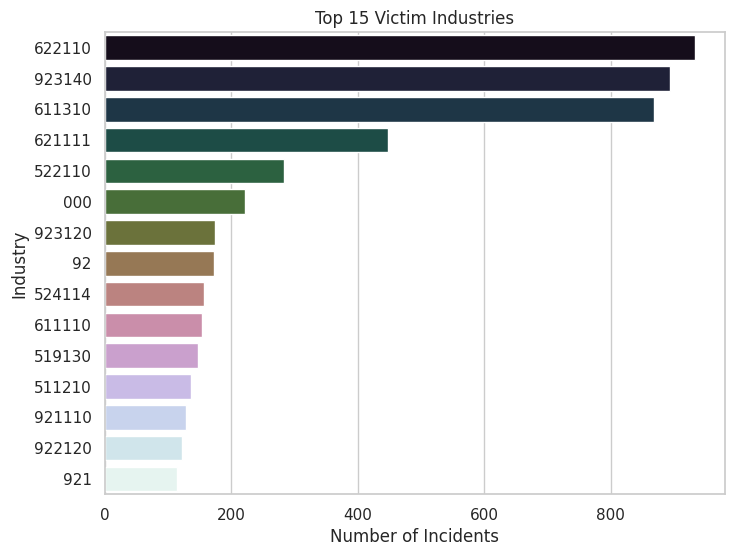

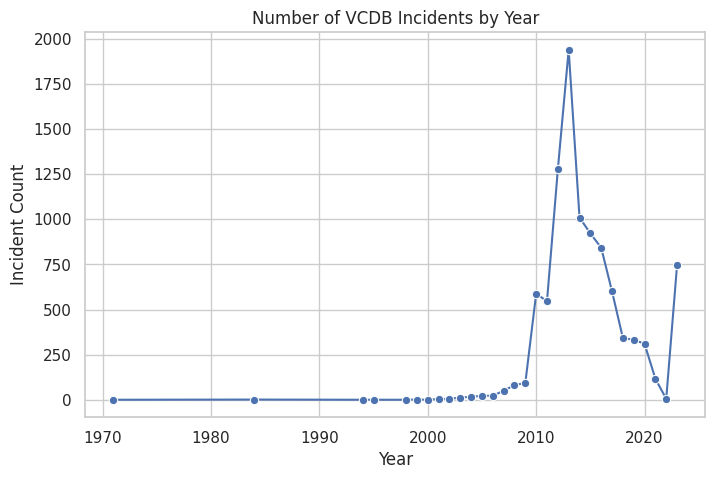

In [7]:
# Top 15 industries
top_industries = df_vcdb['victim.industry'].value_counts().head(15)
plt.figure(figsize=(8,6))
sns.barplot(y=top_industries.index, x=top_industries.values, palette="cubehelix")
plt.title("Top 15 Victim Industries")
plt.xlabel("Number of Incidents")
plt.ylabel("Industry")
plt.show()

# Incidents per year
year_counts = df_vcdb['timeline.incident.year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Number of VCDB Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()

In [8]:
# External actor types
if 'actor.external.variety' in df_vcdb.columns:
    actor_counts = df_vcdb['actor.external.variety'].value_counts().head(15)
    plt.figure(figsize=(7,5))
    sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="magma")
    plt.title("Top External Actor Types")
    plt.xlabel("Count")
    plt.ylabel("Actor Type")
    plt.show()

# Hacking action variety
if 'action.hacking.variety' in df_vcdb.columns:
    hack_counts = df_vcdb['action.hacking.variety'].explode().value_counts().head(15)
    plt.figure(figsize=(7,5))
    sns.barplot(x=hack_counts.values, y=hack_counts.index, palette="viridis")
    plt.title("Top Hacking Actions")
    plt.xlabel("Count")
    plt.ylabel("Hacking Action Type")
    plt.show()

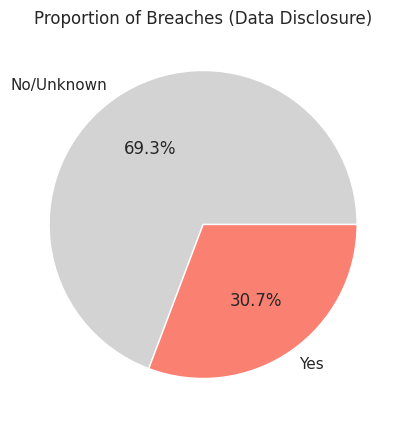

In [9]:
breach_flag = 'attribute.confidentiality.data_disclosure.Yes'

if breach_flag in df_vcdb.columns:
    counts = df_vcdb[breach_flag].value_counts(dropna=False)
    plt.figure(figsize=(5,5))
    counts.plot.pie(autopct='%1.1f%%', labels=['No/Unknown','Yes'], colors=['lightgray','salmon'])
    plt.title("Proportion of Breaches (Data Disclosure)")
    plt.ylabel('')
    plt.show()

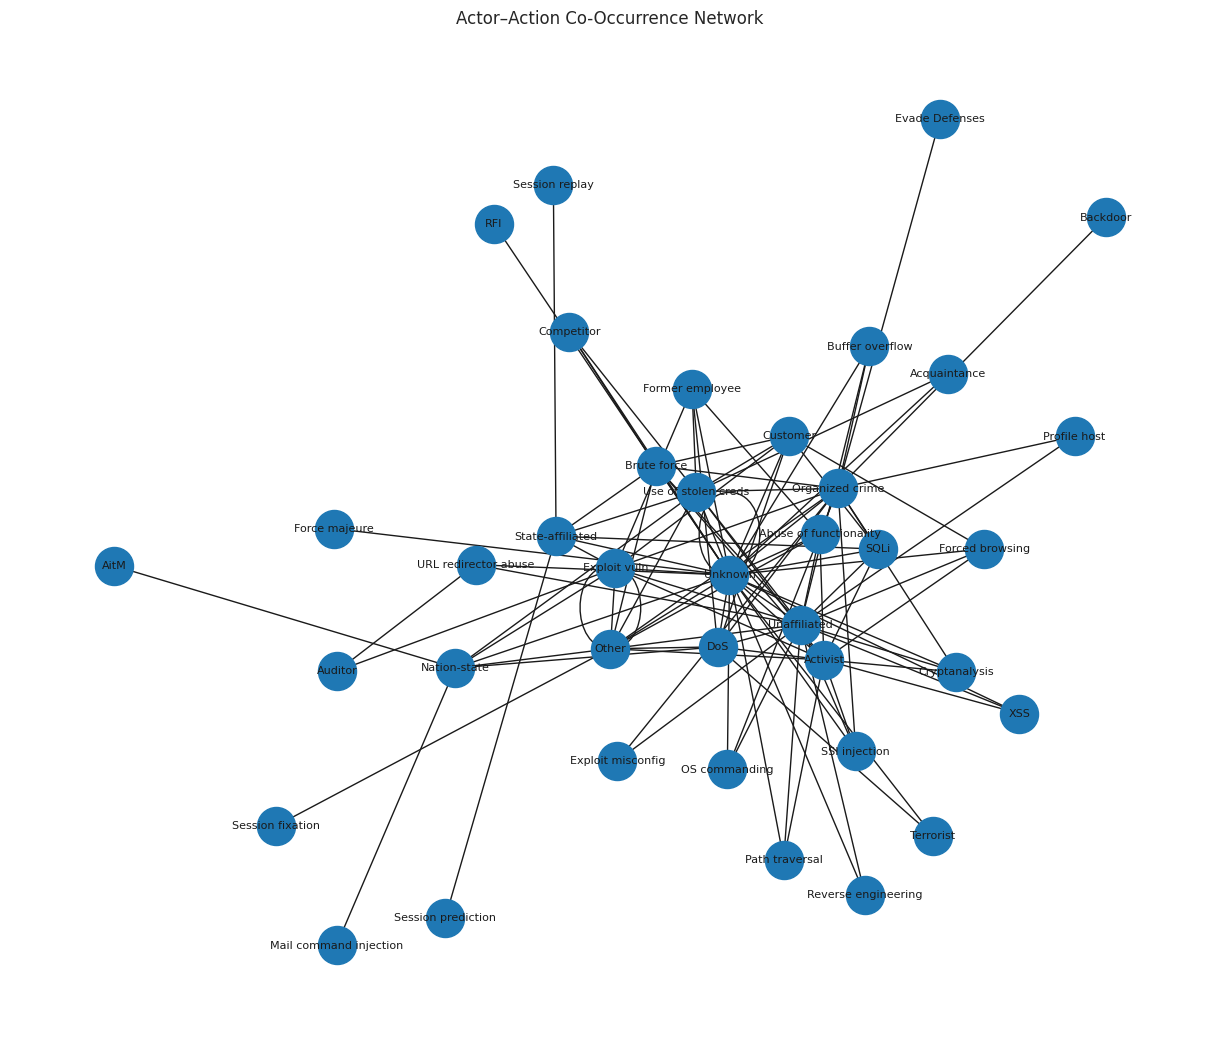

In [12]:
import networkx as nx
import pandas as pd

pairs = []

# Identify all specific actor and hacking variety columns
actor_variety_cols = [col for col in df_vcdb.columns if col.startswith('actor.external.variety.')]
hacking_variety_cols = [col for col in df_vcdb.columns if col.startswith('action.hacking.variety.')]

for _, row in df_vcdb.iterrows():
    actors = []
    hacks = []

    # Populate actors list from boolean variety columns
    for col in actor_variety_cols:
        if row[col]: # If the boolean flag for this variety is True
            actors.append(col.replace('actor.external.variety.', '')) # Extract the variety name

    # Populate hacks list from boolean variety columns
    for col in hacking_variety_cols:
        if row[col]: # If the boolean flag for this variety is True
            hacks.append(col.replace('action.hacking.variety.', '')) # Extract the variety name

    # If there are no specific external actor varieties identified but a general external actor exists
    if not actors and 'actor.external' in df_vcdb.columns and row['actor.external']:
        actors.append('External Actor (unspecified variety)')
    # If there are no specific hacking varieties identified but a general hacking action exists
    if not hacks and 'action.Hacking' in df_vcdb.columns and row['action.Hacking']:
        hacks.append('Hacking (unspecified variety)')

    # Add pairs if both actors and hacks were identified
    for a in actors:
        for h in hacks:
            pairs.append((a, h))

G = nx.Graph() # Create a new graph for each run
if pairs:
    G.add_edges_from(pairs)

plt.figure(figsize=(12,10))
if G.nodes(): # Only draw if there are nodes in the graph
    pos = nx.spring_layout(G, k=0.45, iterations=30)
    nx.draw(G, pos, with_labels=True, node_size=750, font_size=8)
    plt.title("Actor–Action Co-Occurrence Network")
else:
    plt.text(0.5, 0.5, "No co-occurrence data to display.", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title("Actor–Action Co-Occurrence Network")
plt.show()

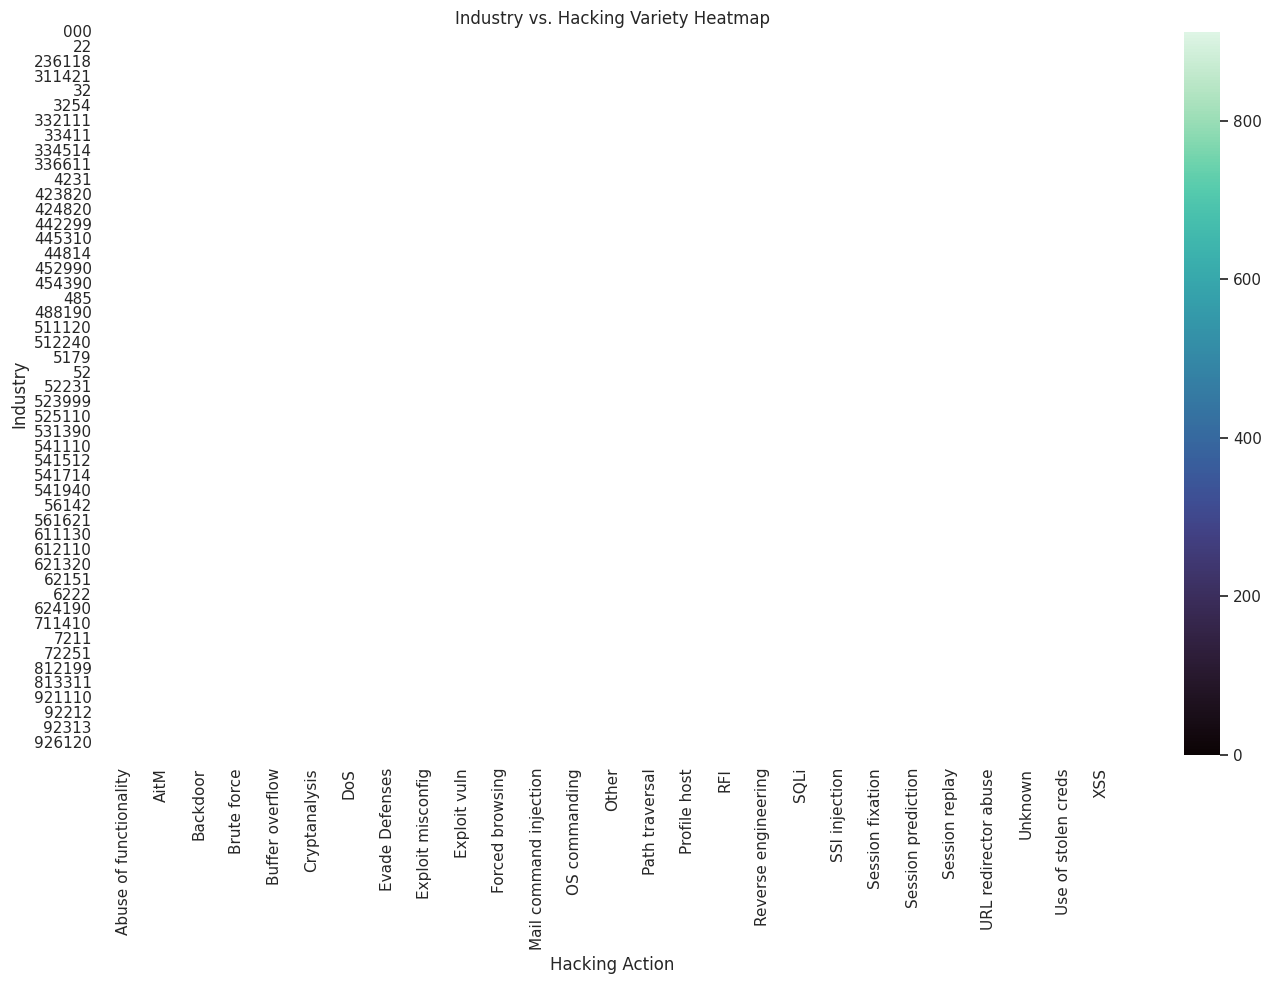

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify all specific hacking variety columns
hacking_variety_cols = [col for col in df_vcdb.columns if col.startswith('action.hacking.variety.')]

# Create a 'hacking_list' column by collecting all true hacking varieties for each incident
def get_hacking_list(row):
    hacks = []
    for col in hacking_variety_cols:
        if row[col]:
            hacks.append(col.replace('action.hacking.variety.', ''))
    return hacks if hacks else ['Unknown'] # Assign 'Unknown' if no specific variety is found

# Create a copy of the DataFrame to prevent fragmentation warnings
df_vcdb_for_heatmap = df_vcdb.copy()
df_vcdb_for_heatmap['hacking_list'] = df_vcdb_for_heatmap.apply(get_hacking_list, axis=1)

heatmap_df = (df_vcdb_for_heatmap
              .explode('hacking_list')
              .groupby(['victim.industry', 'hacking_list'])
              .size()
              .reset_index(name='count'))

pivot = heatmap_df.pivot_table(index='victim.industry',
                               columns='hacking_list',
                               values='count',
                               fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap='mako', linewidths=.5)
plt.title("Industry vs. Hacking Variety Heatmap")
plt.xlabel("Hacking Action")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

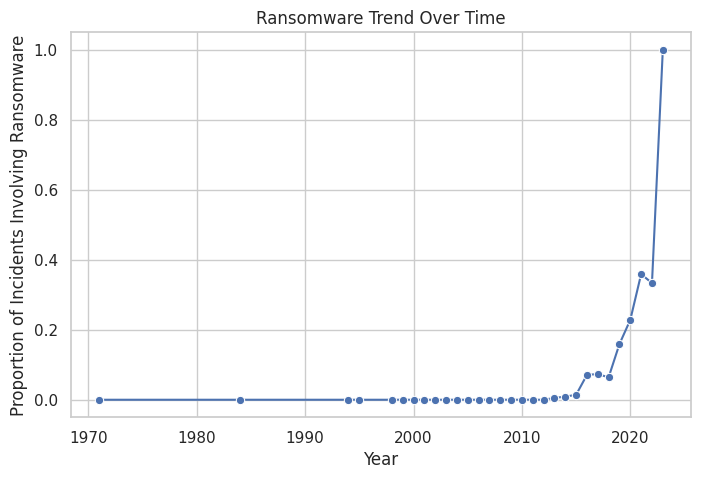

In [17]:
# Identify all specific malware variety columns
malware_variety_cols = [col for col in df_vcdb.columns if col.startswith('action.malware.variety.')]

# Create a 'malware_list' column by collecting all true malware varieties for each incident
def get_malware_list(row):
    malware = []
    for col in malware_variety_cols:
        if row[col]:
            malware.append(col.replace('action.malware.variety.', ''))
    return malware if malware else ['Unknown'] # Assign 'Unknown' if no specific variety is found

# Create a copy of the DataFrame to prevent fragmentation warnings
df_vcdb_for_malware = df_vcdb.copy()
df_vcdb_for_malware['malware_list'] = df_vcdb_for_malware.apply(get_malware_list, axis=1)

df_vcdb_for_malware['is_ransomware'] = df_vcdb_for_malware['malware_list'].apply(
    lambda lst: any("ransom" in str(x).lower() for x in lst) if isinstance(lst, list) else False
)

ransom_trend = df_vcdb_for_malware.groupby('timeline.incident.year')['is_ransomware'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=ransom_trend.index, y=ransom_trend.values, marker='o')
plt.title("Ransomware Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Incidents Involving Ransomware")
plt.show()

In [21]:
def score(field):
    # Ensure boolean columns are treated as integers (True=1, False=0)
    return df_vcdb[field].astype(int) if field in df_vcdb.columns else pd.Series(0, index=df_vcdb.index)

# Create a copy of the DataFrame to avoid fragmentation warnings when adding new columns
df_vcdb_scored = df_vcdb.copy()

df_vcdb_scored['conf'] = score('attribute.confidentiality.data_disclosure.Yes')
df_vcdb_scored['integ'] = score('attribute.integrity.loss.Yes') # Corrected column name
df_vcdb_scored['avail'] = score('attribute.availability.loss.Yes') # Corrected column name

df_vcdb_scored['severity_score'] = df_vcdb_scored[['conf','integ','avail']].sum(axis=1)

severity_by_industry = df_vcdb_scored.groupby('victim.industry')['severity_score'].mean().sort_values(ascending=False)

print("Top 15 Industries by Average Severity Score:")
print(severity_by_industry.head(15))

Top 15 Industries by Average Severity Score:
victim.industry
211       1.0
932120    1.0
212210    1.0
212221    1.0
22        1.0
113110    1.0
115210    1.0
115310    1.0
9241      1.0
532111    1.0
53221     1.0
532230    1.0
532283    1.0
532289    1.0
524128    1.0
Name: severity_score, dtype: float64


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans

mlb = MultiLabelBinarizer()

hacks_encoded = mlb.fit_transform(df_vcdb['hacking_list'])
hack_df = pd.DataFrame(hacks_encoded, columns=mlb.classes_)

kmeans = KMeans(n_clusters=5, random_state=42)
df_vcdb['cluster'] = kmeans.fit_predict(hack_df)

df_vcdb[['victim.industry', 'cluster']].head()


/tmp/ipython-input-3499317468.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_vcdb['cluster'] = kmeans.fit_predict(hack_df)


,victim.industry,cluster
0,541219,0
1,524210,0
2,3364,0
3,611310,1
4,522110,0


In [23]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df_vcdb['outlier_flag'] = iso.fit_predict(hack_df)

outliers = df_vcdb[df_vcdb['outlier_flag'] == -1]
outliers.head()


/tmp/ipython-input-671870732.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_vcdb['outlier_flag'] = iso.fit_predict(hack_df)


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.secondary.victim_id,victim.state,victim.victim_id,hacking_list,conf,integ,avail,severity_score,cluster,outlier_flag
102,False,False,True,True,False,False,True,False,NaN,False,...,NaN,NaN,NaN,"[Brute force, Use of stolen creds]",1,0,0,1,3,-1
110,False,True,True,False,False,False,False,False,NaN,False,...,NaN,NaN,Pakistan International Airline,"[Abuse of functionality, Exploit vuln]",0,0,0,0,1,-1
114,False,False,True,False,False,False,False,False,NaN,False,...,NaN,NaN,Blizzard,[DoS],0,0,0,0,2,-1
134,False,False,True,True,False,False,True,False,NaN,False,...,NaN,NaN,NaN,"[Brute force, Use of stolen creds]",1,0,0,1,3,-1
148,False,False,True,False,False,False,False,False,NaN,False,...,NaN,FL,Florida Bar Association,"[Abuse of functionality, Exploit vuln]",0,0,0,0,1,-1


In [24]:
industry_profiles = (
    df_vcdb
    .explode('hacking_list')
    .groupby(['victim.industry', 'hacking_list'])
    .size()
    .reset_index(name='count')
)

industry_top = industry_profiles.loc[industry_profiles.groupby('victim.industry')['count'].idxmax()]

industry_top


,victim.industry,hacking_list,count
7,000,Unknown,179
10,11,DoS,1
11,111332,Unknown,1
12,113110,Unknown,1
13,115210,Unknown,1
...,...,...,...
1394,92811,Unknown,23
1400,928110,Unknown,75
1406,928120,Use of stolen creds,49
1407,932120,Unknown,1


In [26]:
summary = {
    "Total Incidents": len(df_vcdb),
    "Industries Represented": df_vcdb['victim.industry'].nunique(),
    "Most Targeted Industry": df_vcdb['victim.industry'].value_counts().idxmax(),
    "Most Common Attack Type": df_vcdb['hacking_list'].explode().value_counts().idxmax(),
    "Percent Breaches": df_vcdb['attribute.confidentiality.data_disclosure.Yes'].mean()
}

pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

,Value
Total Incidents,9906
Industries Represented,781
Most Targeted Industry,622110
Most Common Attack Type,Unknown
Percent Breaches,0.692611
